## Steps :
- Importing Libraries
- Importing Data
- EDA
- Visualisation
- Model Evaluataion
- Decision Tree Classification
- Hyper Parameter Tunning
- Interview Questions

# Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (10,10)
plt.rcParams['figure.dpi'] = 500
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier , DecisionTreeRegressor
from sklearn import tree
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


# Importing Data

In [3]:
df = pd.read_excel( 'heart_disease.xlsx', sheet_name='Heart_disease')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,Male,asymptomatic,125,0,False,normal,120,False,1.5,upsloping,reversable defect,4
904,62,Male,asymptomatic,166,170,False,st-t abnormality,120,True,3.0,flat,reversable defect,4
905,56,Male,non-anginal,170,0,False,lv hypertrophy,123,True,2.5,downsloping,normal,4
906,56,Male,non-anginal,144,208,True,st-t abnormality,105,TURE,NaN,downsloping,fixed defect,4


# EDA

In [4]:
# Perform exploratory data analysis to understand the structure of the dataset.

df.dtypes

,0
age,int64
sex,object
cp,object
trestbps,int64
chol,int64
fbs,bool
restecg,object
thalch,int64
exang,object
oldpeak,float64


In [5]:
df.describe()

,age,trestbps,chol,thalch,oldpeak,num
count,908.000000,908.000000,908.000000,908.000000,846.000000,908.000000
mean,53.791850,133.430617,201.484581,135.957048,0.891253,1.008811
std,9.158031,20.401608,112.097949,26.804929,1.093875,1.144436
min,29.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.750000,120.000000,176.750000,118.000000,0.000000,0.000000
50%,54.000000,130.000000,224.000000,138.000000,0.500000,1.000000
75%,60.000000,144.000000,270.000000,156.000000,1.500000,2.000000
max,77.000000,200.000000,603.000000,202.000000,6.200000,4.000000


In [6]:
# Checking for missing values,

df.isna().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalch,0
exang,0
oldpeak,62


In [7]:
df=df.dropna()

In [8]:
df.isna().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalch,0
exang,0
oldpeak,0


In [9]:
df.duplicated().sum()

np.int64(1)

In [10]:
df.drop_duplicates(inplace=True)

In [11]:
df.duplicated().sum()

np.int64(0)

In [12]:
df.dropna()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
901,51,Male,asymptomatic,110,0,True,normal,92,False,0.0,flat,fixed defect,4
902,62,Male,asymptomatic,160,254,True,st-t abnormality,108,True,3.0,flat,normal,4
903,53,Male,asymptomatic,125,0,False,normal,120,False,1.5,upsloping,reversable defect,4
904,62,Male,asymptomatic,166,170,False,st-t abnormality,120,True,3.0,flat,reversable defect,4


In [13]:
# checking for the Outliers

def outlier_Detection(df,columns):
    for col in columns:
        Q1=df[col].quantile(0.25)
        Q3=df[col].quantile(0.75)
        iqr=Q3-Q1
        lower=Q1-1.5*iqr
        upper=Q3+1.5*iqr
        df[col]=np.where(df[col]>upper,upper,np.where(df[col]<lower,lower,df[col]))
    return df

In [14]:
outlier_Detection(df,['age','trestbps','chol','thalch','oldpeak'])

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63.0,Male,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,fixed defect,0
1,41.0,Male,atypical angina,135.0,203.0,False,normal,132.0,False,0.0,flat,fixed defect,0
2,57.0,Male,asymptomatic,140.0,192.0,False,normal,148.0,False,0.4,flat,fixed defect,0
3,52.0,Male,typical angina,118.0,186.0,False,lv hypertrophy,190.0,False,0.0,flat,fixed defect,0
4,57.0,Male,asymptomatic,110.0,201.0,False,normal,126.0,True,1.5,flat,fixed defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
901,51.0,Male,asymptomatic,110.0,37.5,True,normal,92.0,False,0.0,flat,fixed defect,4
902,62.0,Male,asymptomatic,160.0,254.0,True,st-t abnormality,108.0,True,3.0,flat,normal,4
903,53.0,Male,asymptomatic,125.0,37.5,False,normal,120.0,False,1.5,upsloping,reversable defect,4
904,62.0,Male,asymptomatic,166.0,170.0,False,st-t abnormality,120.0,True,3.0,flat,reversable defect,4


# Visualisation

<Figure size 5000x2500 with 0 Axes>

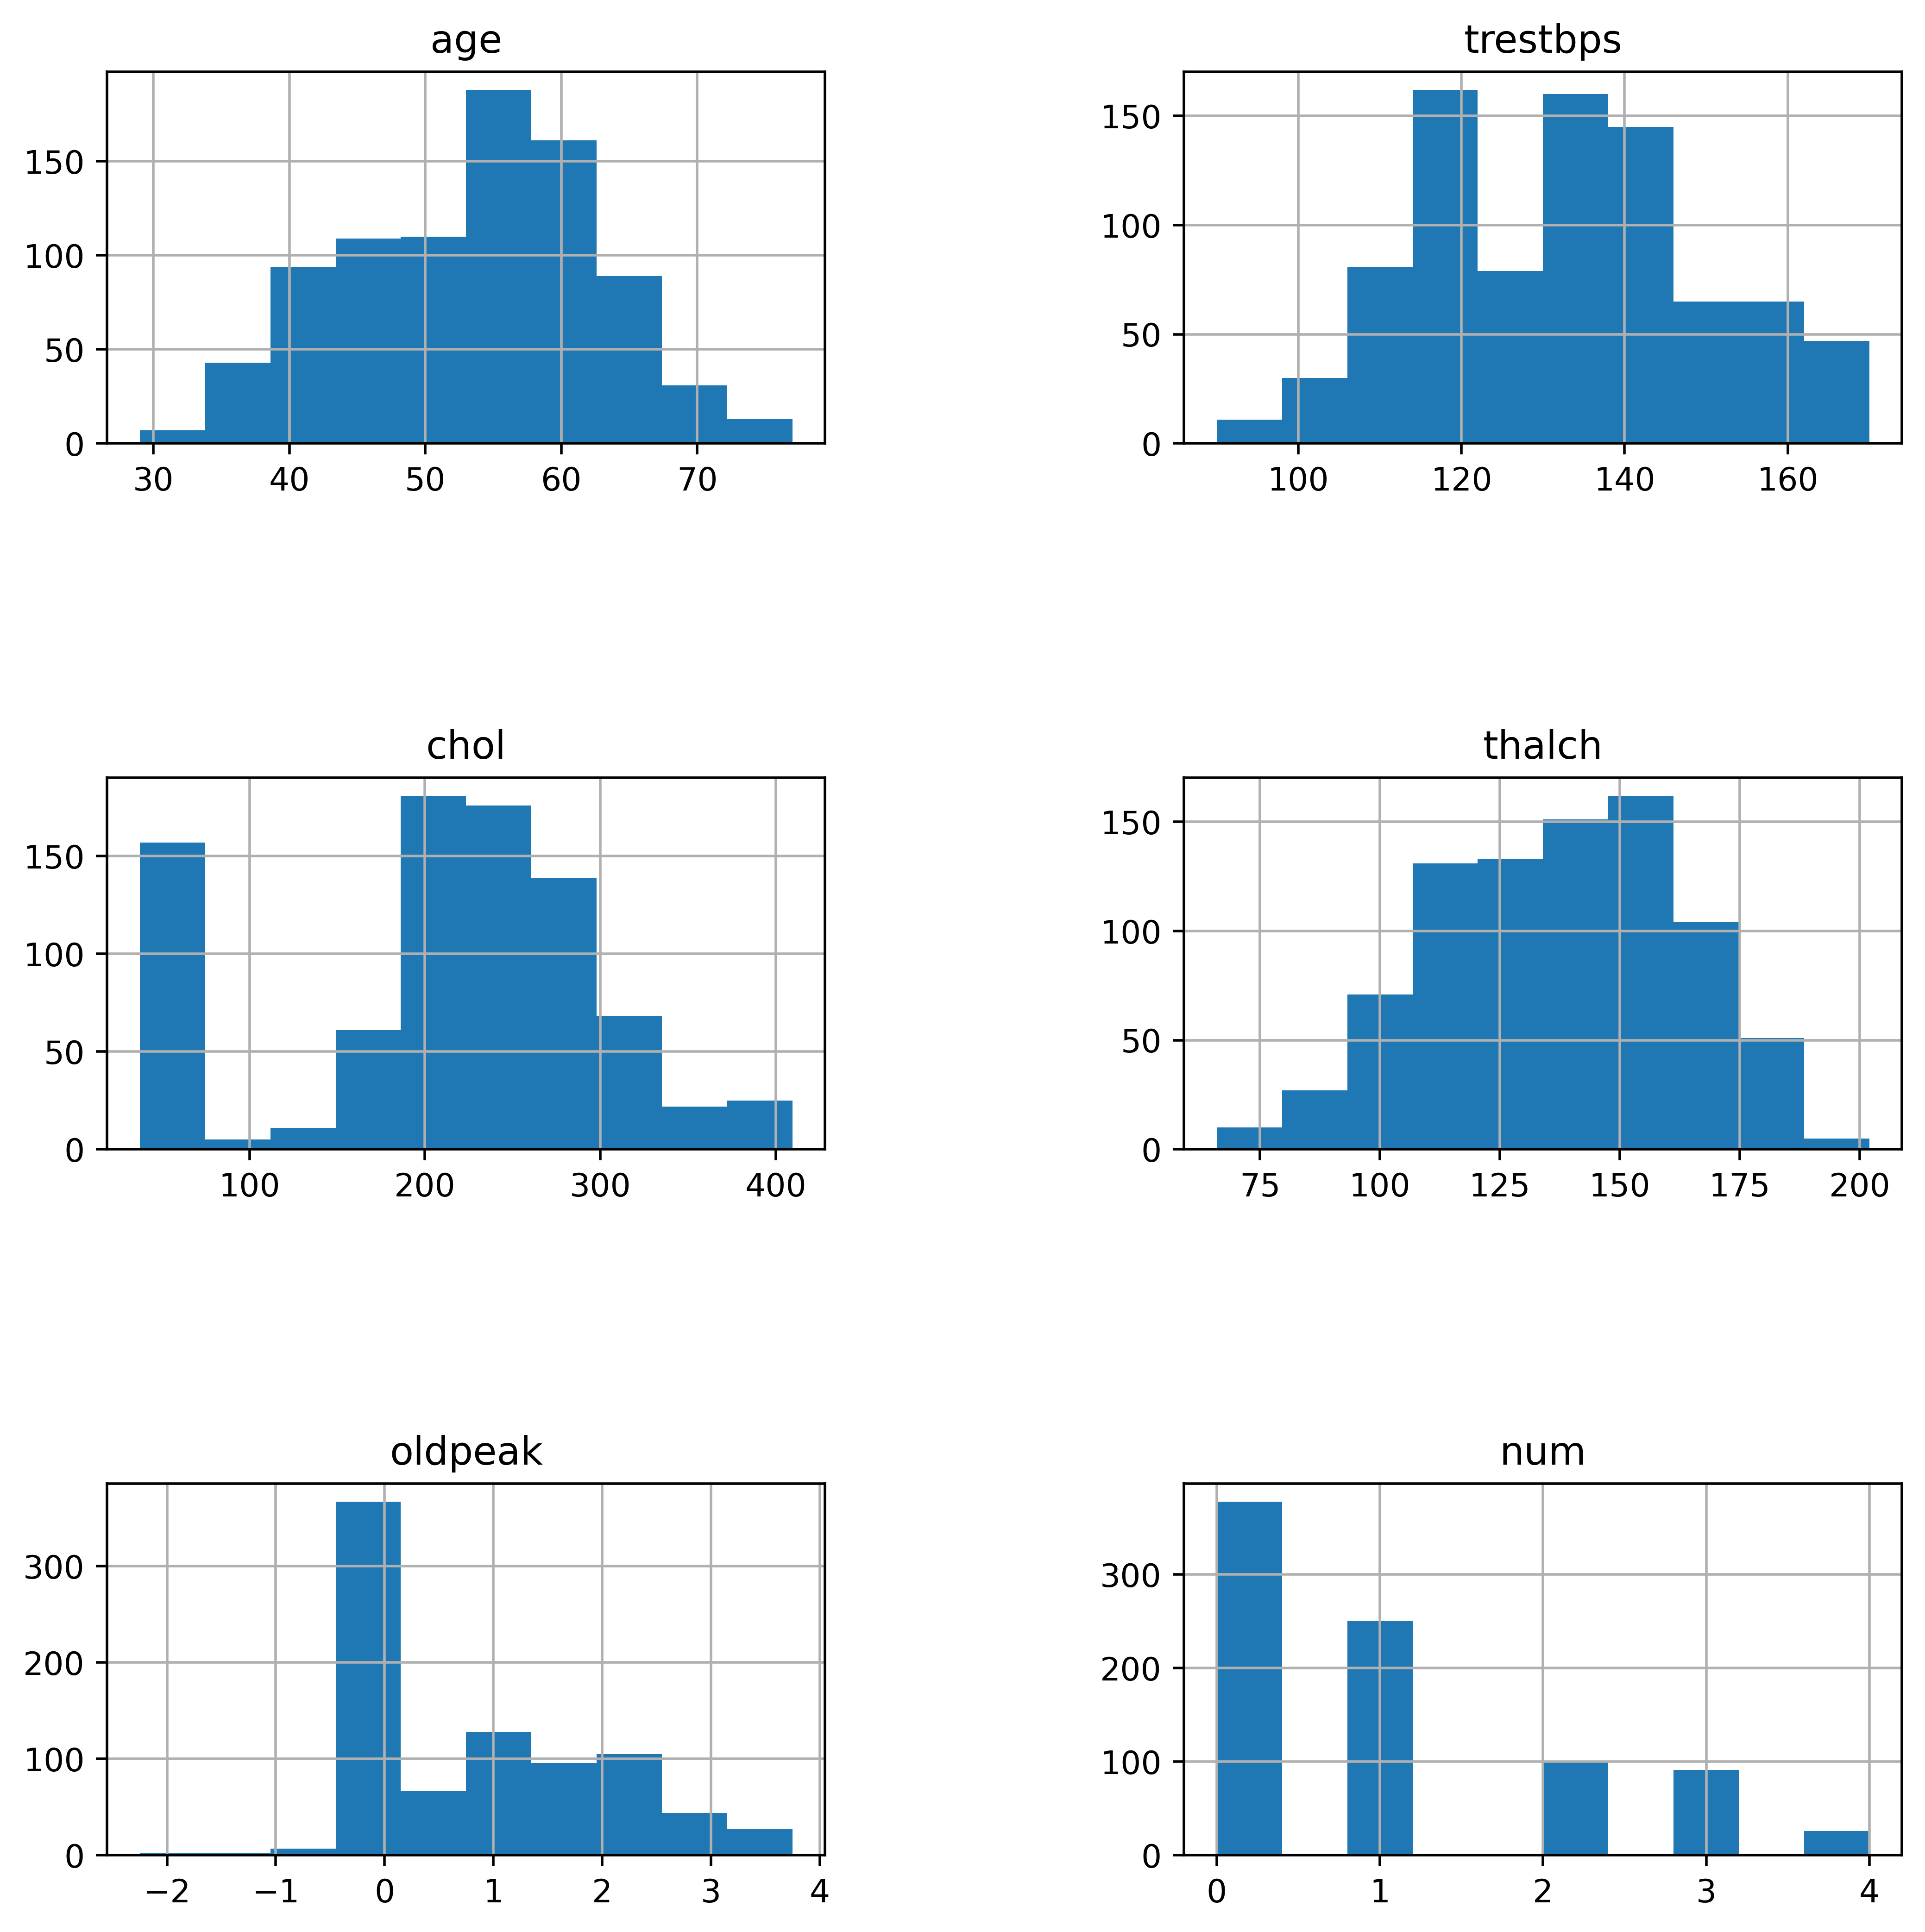

In [15]:
# Histogram

plt.figure(figsize=(10,5))
plt.tight_layout()
df.hist()
plt.subplots_adjust(hspace = 0.9, wspace = 0.5)
plt.show()

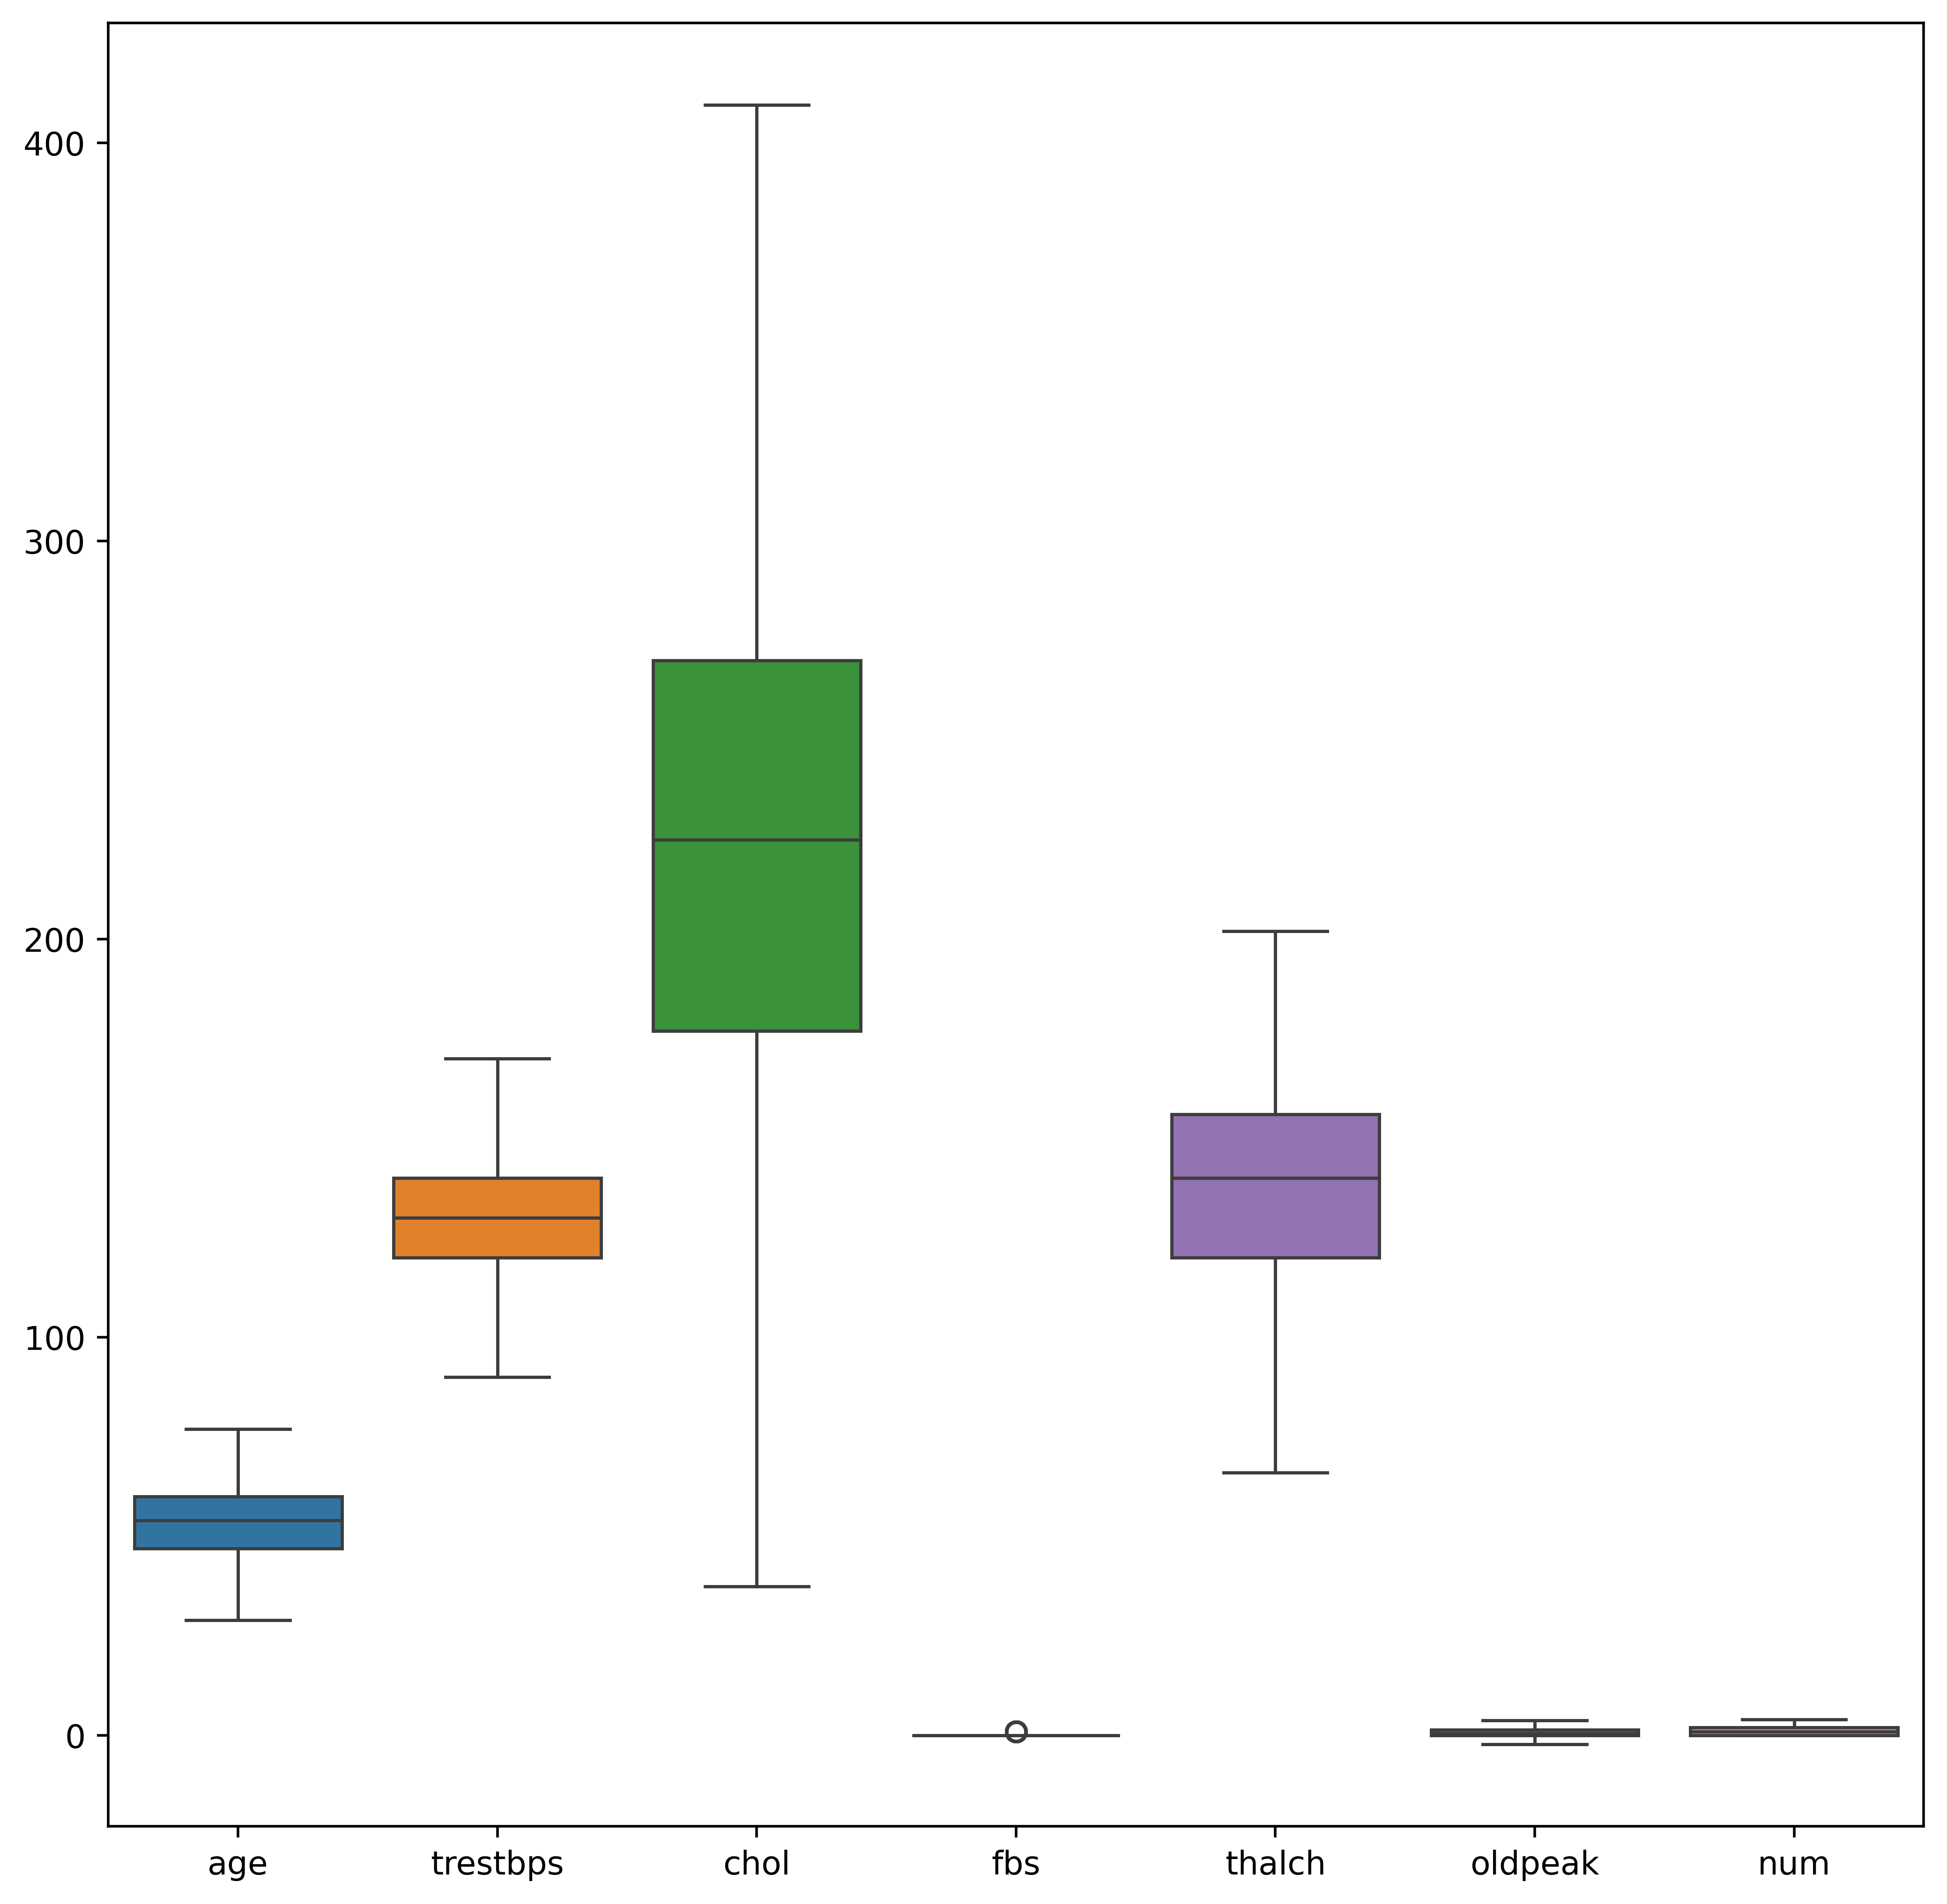

In [16]:
# Boxplot

sns.boxplot(df)
plt.show()

In [17]:
df.dtypes

,0
age,float64
sex,object
cp,object
trestbps,float64
chol,float64
fbs,bool
restecg,object
thalch,float64
exang,object
oldpeak,float64


In [18]:
def replace_outliers(series):
    if np.issubdtype(series.dtype, np.number):  # Check if the series is numeric
        Q1 = series.quantile(0.25)
        Q3 = series.quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Replace outliers with the nearest non-outlier value
        series[series < lower_bound] = series[series >= lower_bound].min()
        series[series > upper_bound] = series[series <= upper_bound].max()
    return series

# Apply the function to each column of the DataFrame
df_cleaned = df.apply(replace_outliers, axis=0)

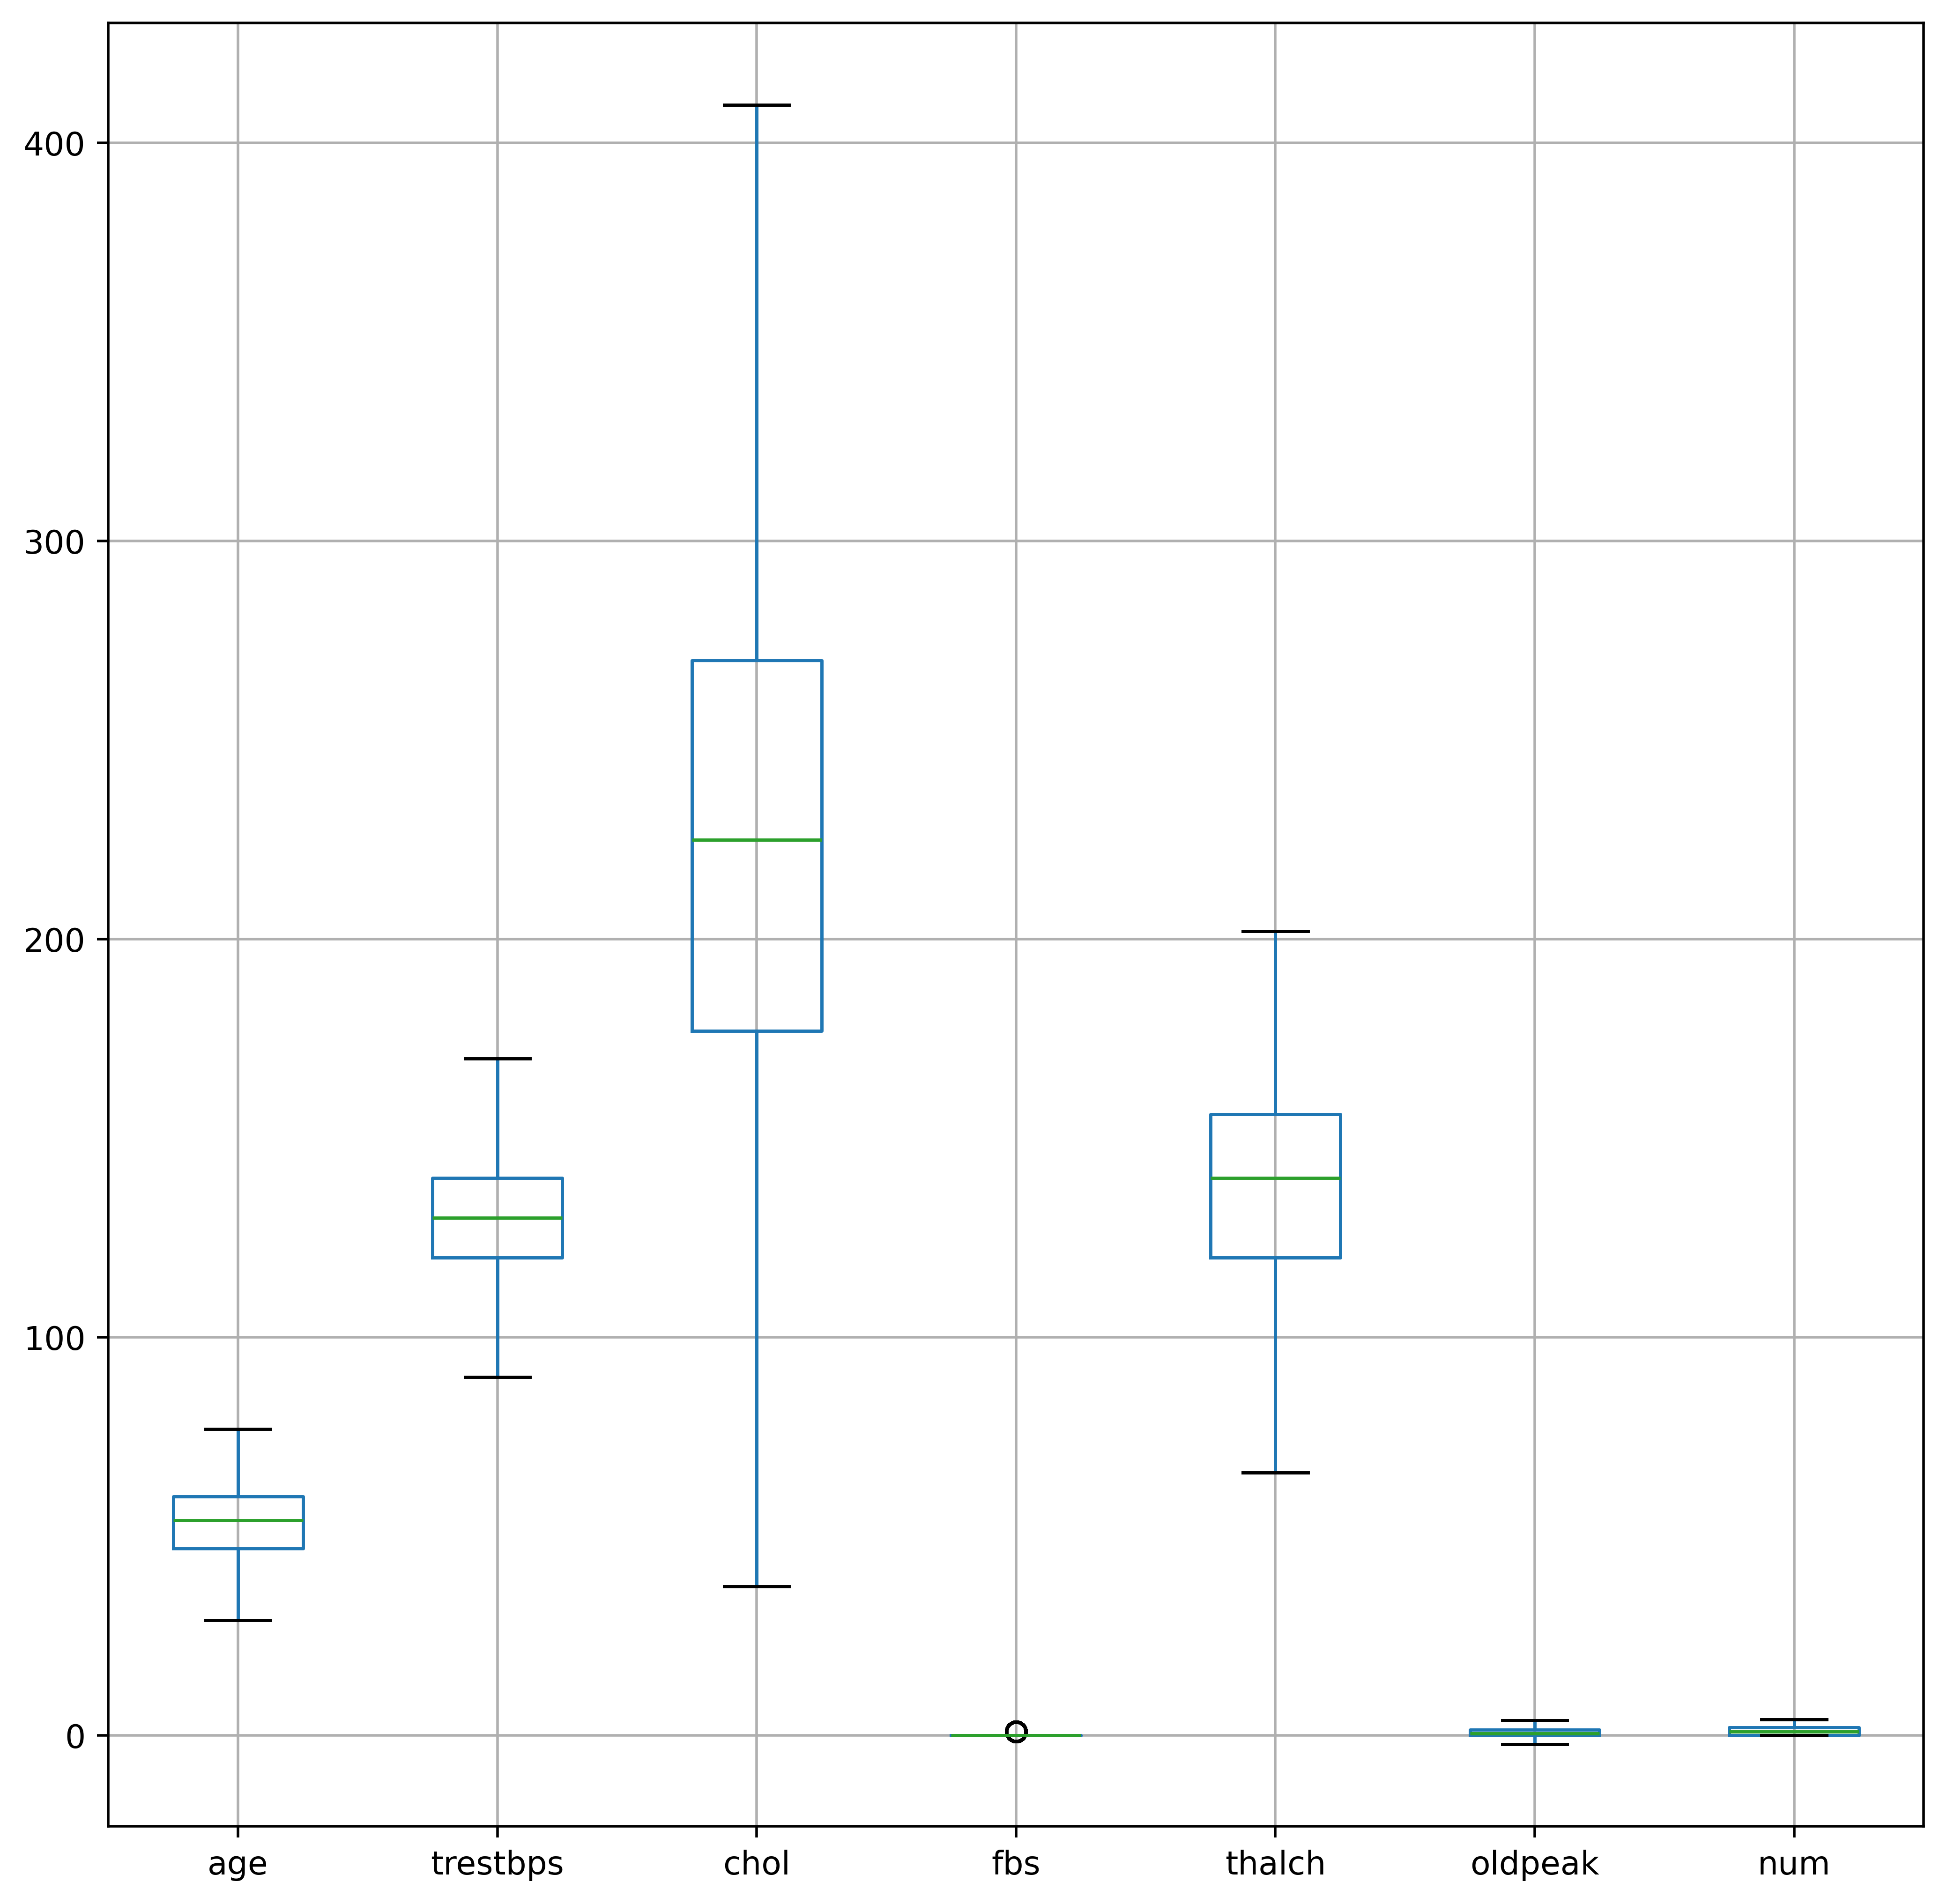

In [19]:
df.boxplot()
plt.show()

In [20]:
# Perform one-hot encoding for categorical columns
df_encoded = pd.get_dummies(df, columns=['sex', 'cp', 'restecg', 'exang', 'slope', 'thal']).astype(int)


# Calculate the correlation matrix
correlation_matrix = df_encoded.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Features', fontsize=16)
plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [21]:
df1=df_encoded

In [22]:
df1['num'].replace([0,1,2,3,4],['No heart disease','First stages of heart disease','Second stages of heart disease','Third stages of heart disease','Fourth stages of heart disease'], inplace=True)

In [23]:
df1.head()

,age,trestbps,chol,fbs,thalch,oldpeak,num,sex_Female,sex_Male,cp_asymptomatic,...,restecg_st-t abnormality,exang_False,exang_True,exang_FALSE,slope_downsloping,slope_flat,slope_upsloping,thal_fixed defect,thal_normal,thal_reversable defect
0,63,145,233,1,150,2,No heart disease,0,1,0,...,0,1,0,0,1,0,0,1,0,0
1,41,135,203,0,132,0,No heart disease,0,1,0,...,0,1,0,0,0,1,0,1,0,0
2,57,140,192,0,148,0,No heart disease,0,1,1,...,0,1,0,0,0,1,0,1,0,0
3,52,118,186,0,190,0,No heart disease,0,1,0,...,0,1,0,0,0,1,0,1,0,0
4,57,110,201,0,126,1,No heart disease,0,1,1,...,0,0,1,0,0,1,0,1,0,0


# Model Evaluation

In [24]:
x= df1.drop(columns=['num'])  # Features
y = df1['num']  # Target variable


In [25]:
# Split the dataset into training and testing sets (e.g., using an 80-20 split).

xtrain,xtest,ytrain,ytest= train_test_split(x,y,test_size=0.2,random_state=1)


In [26]:
xtrain.head()

,age,trestbps,chol,fbs,thalch,oldpeak,sex_Female,sex_Male,cp_asymptomatic,cp_atypical angina,...,restecg_st-t abnormality,exang_False,exang_True,exang_FALSE,slope_downsloping,slope_flat,slope_upsloping,thal_fixed defect,thal_normal,thal_reversable defect
136,51,125,213,0,125,1,0,1,0,0,...,0,0,1,0,0,0,1,0,1,0
850,53,144,300,1,128,1,0,1,1,0,...,1,0,1,0,0,1,0,0,0,1
857,58,160,256,1,113,1,0,1,1,0,...,0,0,1,0,0,0,1,1,0,0
135,74,120,269,0,121,0,1,0,0,1,...,0,0,1,0,0,0,1,0,1,0
514,60,130,37,1,130,1,0,1,1,0,...,1,0,1,0,1,0,0,0,1,0


In [27]:
ytrain

,num
136,No heart disease
850,Third stages of heart disease
857,Third stages of heart disease
135,No heart disease
514,First stages of heart disease
...,...
751,Second stages of heart disease
813,Third stages of heart disease
73,No heart disease
236,No heart disease


In [28]:
dt = DecisionTreeClassifier(criterion='entropy')

dt.fit(xtrain,ytrain)
ypred = dt.predict(xtest)
ypred

array(['First stages of heart disease', 'No heart disease',
       'No heart disease', 'First stages of heart disease',
       'No heart disease', 'First stages of heart disease',
       'Third stages of heart disease', 'Third stages of heart disease',
       'Fourth stages of heart disease', 'Second stages of heart disease',
       'First stages of heart disease', 'Third stages of heart disease',
       'First stages of heart disease', 'First stages of heart disease',
       'Third stages of heart disease', 'Fourth stages of heart disease',
       'No heart disease', 'No heart disease', 'No heart disease',
       'No heart disease', 'No heart disease',
       'First stages of heart disease', 'No heart disease',
       'No heart disease', 'No heart disease',
       'Fourth stages of heart disease', 'First stages of heart disease',
       'No heart disease', 'No heart disease', 'No heart disease',
       'No heart disease', 'No heart disease',
       'Third stages of heart disease', 'Fi

In [29]:
x.columns

Index(['age', 'trestbps', 'chol', 'fbs', 'thalch', 'oldpeak', 'sex_Female',
       'sex_Male', 'cp_asymptomatic', 'cp_atypical angina', 'cp_non-anginal',
       'cp_typical angina', 'restecg_lv hypertrophy', 'restecg_normal',
       'restecg_st-t abnormality', 'exang_False', 'exang_True', 'exang_FALSE',
       'slope_downsloping', 'slope_flat', 'slope_upsloping',
       'thal_fixed defect', 'thal_normal', 'thal_reversable defect'],
      dtype='object')

In [30]:
dt.feature_importances_

array([0.154128  , 0.11331858, 0.15435052, 0.01643643, 0.17148579,
       0.06839246, 0.01095649, 0.01006361, 0.10323375, 0.00898361,
       0.        , 0.        , 0.02365813, 0.00317069, 0.02834802,
       0.03199189, 0.        , 0.        , 0.02219263, 0.01536738,
       0.01261523, 0.00797053, 0.01174868, 0.03158758])

# Model Evaluation

In [31]:
from sklearn.metrics import classification_report, confusion_matrix

In [32]:
print(classification_report(ytest,ypred))

                                precision    recall  f1-score   support

 First stages of heart disease       0.35      0.39      0.37        44
Fourth stages of heart disease       0.20      0.25      0.22         8
              No heart disease       0.67      0.71      0.69        70
Second stages of heart disease       0.33      0.25      0.29        24
 Third stages of heart disease       0.24      0.17      0.20        23

                      accuracy                           0.47       169
                     macro avg       0.36      0.35      0.35       169
                  weighted avg       0.46      0.47      0.46       169



In [33]:
confusion_matrix(ytest,ypred)

array([[17,  3, 12,  7,  5],
       [ 2,  2,  2,  0,  2],
       [15,  0, 50,  4,  1],
       [ 6,  2,  5,  6,  5],
       [ 9,  3,  6,  1,  4]])

In [34]:
dt.score(xtrain,ytrain)
dt.score(xtest,ytest)

0.46745562130177515

In [35]:
print('Training accuracy: ', dt.score(xtrain,ytrain))
print('Testing Accuracy: ', np.round(dt.score(xtest,ytest),2))

Training accuracy:  1.0
Testing Accuracy:  0.47


In [36]:
x.columns

Index(['age', 'trestbps', 'chol', 'fbs', 'thalch', 'oldpeak', 'sex_Female',
       'sex_Male', 'cp_asymptomatic', 'cp_atypical angina', 'cp_non-anginal',
       'cp_typical angina', 'restecg_lv hypertrophy', 'restecg_normal',
       'restecg_st-t abnormality', 'exang_False', 'exang_True', 'exang_FALSE',
       'slope_downsloping', 'slope_flat', 'slope_upsloping',
       'thal_fixed defect', 'thal_normal', 'thal_reversable defect'],
      dtype='object')

In [37]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63.0,Male,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,fixed defect,0
1,41.0,Male,atypical angina,135.0,203.0,False,normal,132.0,False,0.0,flat,fixed defect,0
2,57.0,Male,asymptomatic,140.0,192.0,False,normal,148.0,False,0.4,flat,fixed defect,0
3,52.0,Male,typical angina,118.0,186.0,False,lv hypertrophy,190.0,False,0.0,flat,fixed defect,0
4,57.0,Male,asymptomatic,110.0,201.0,False,normal,126.0,True,1.5,flat,fixed defect,0


In [38]:
df['num'].unique()

array([0, 1, 2, 3, 4])

## Decision Tree Classification

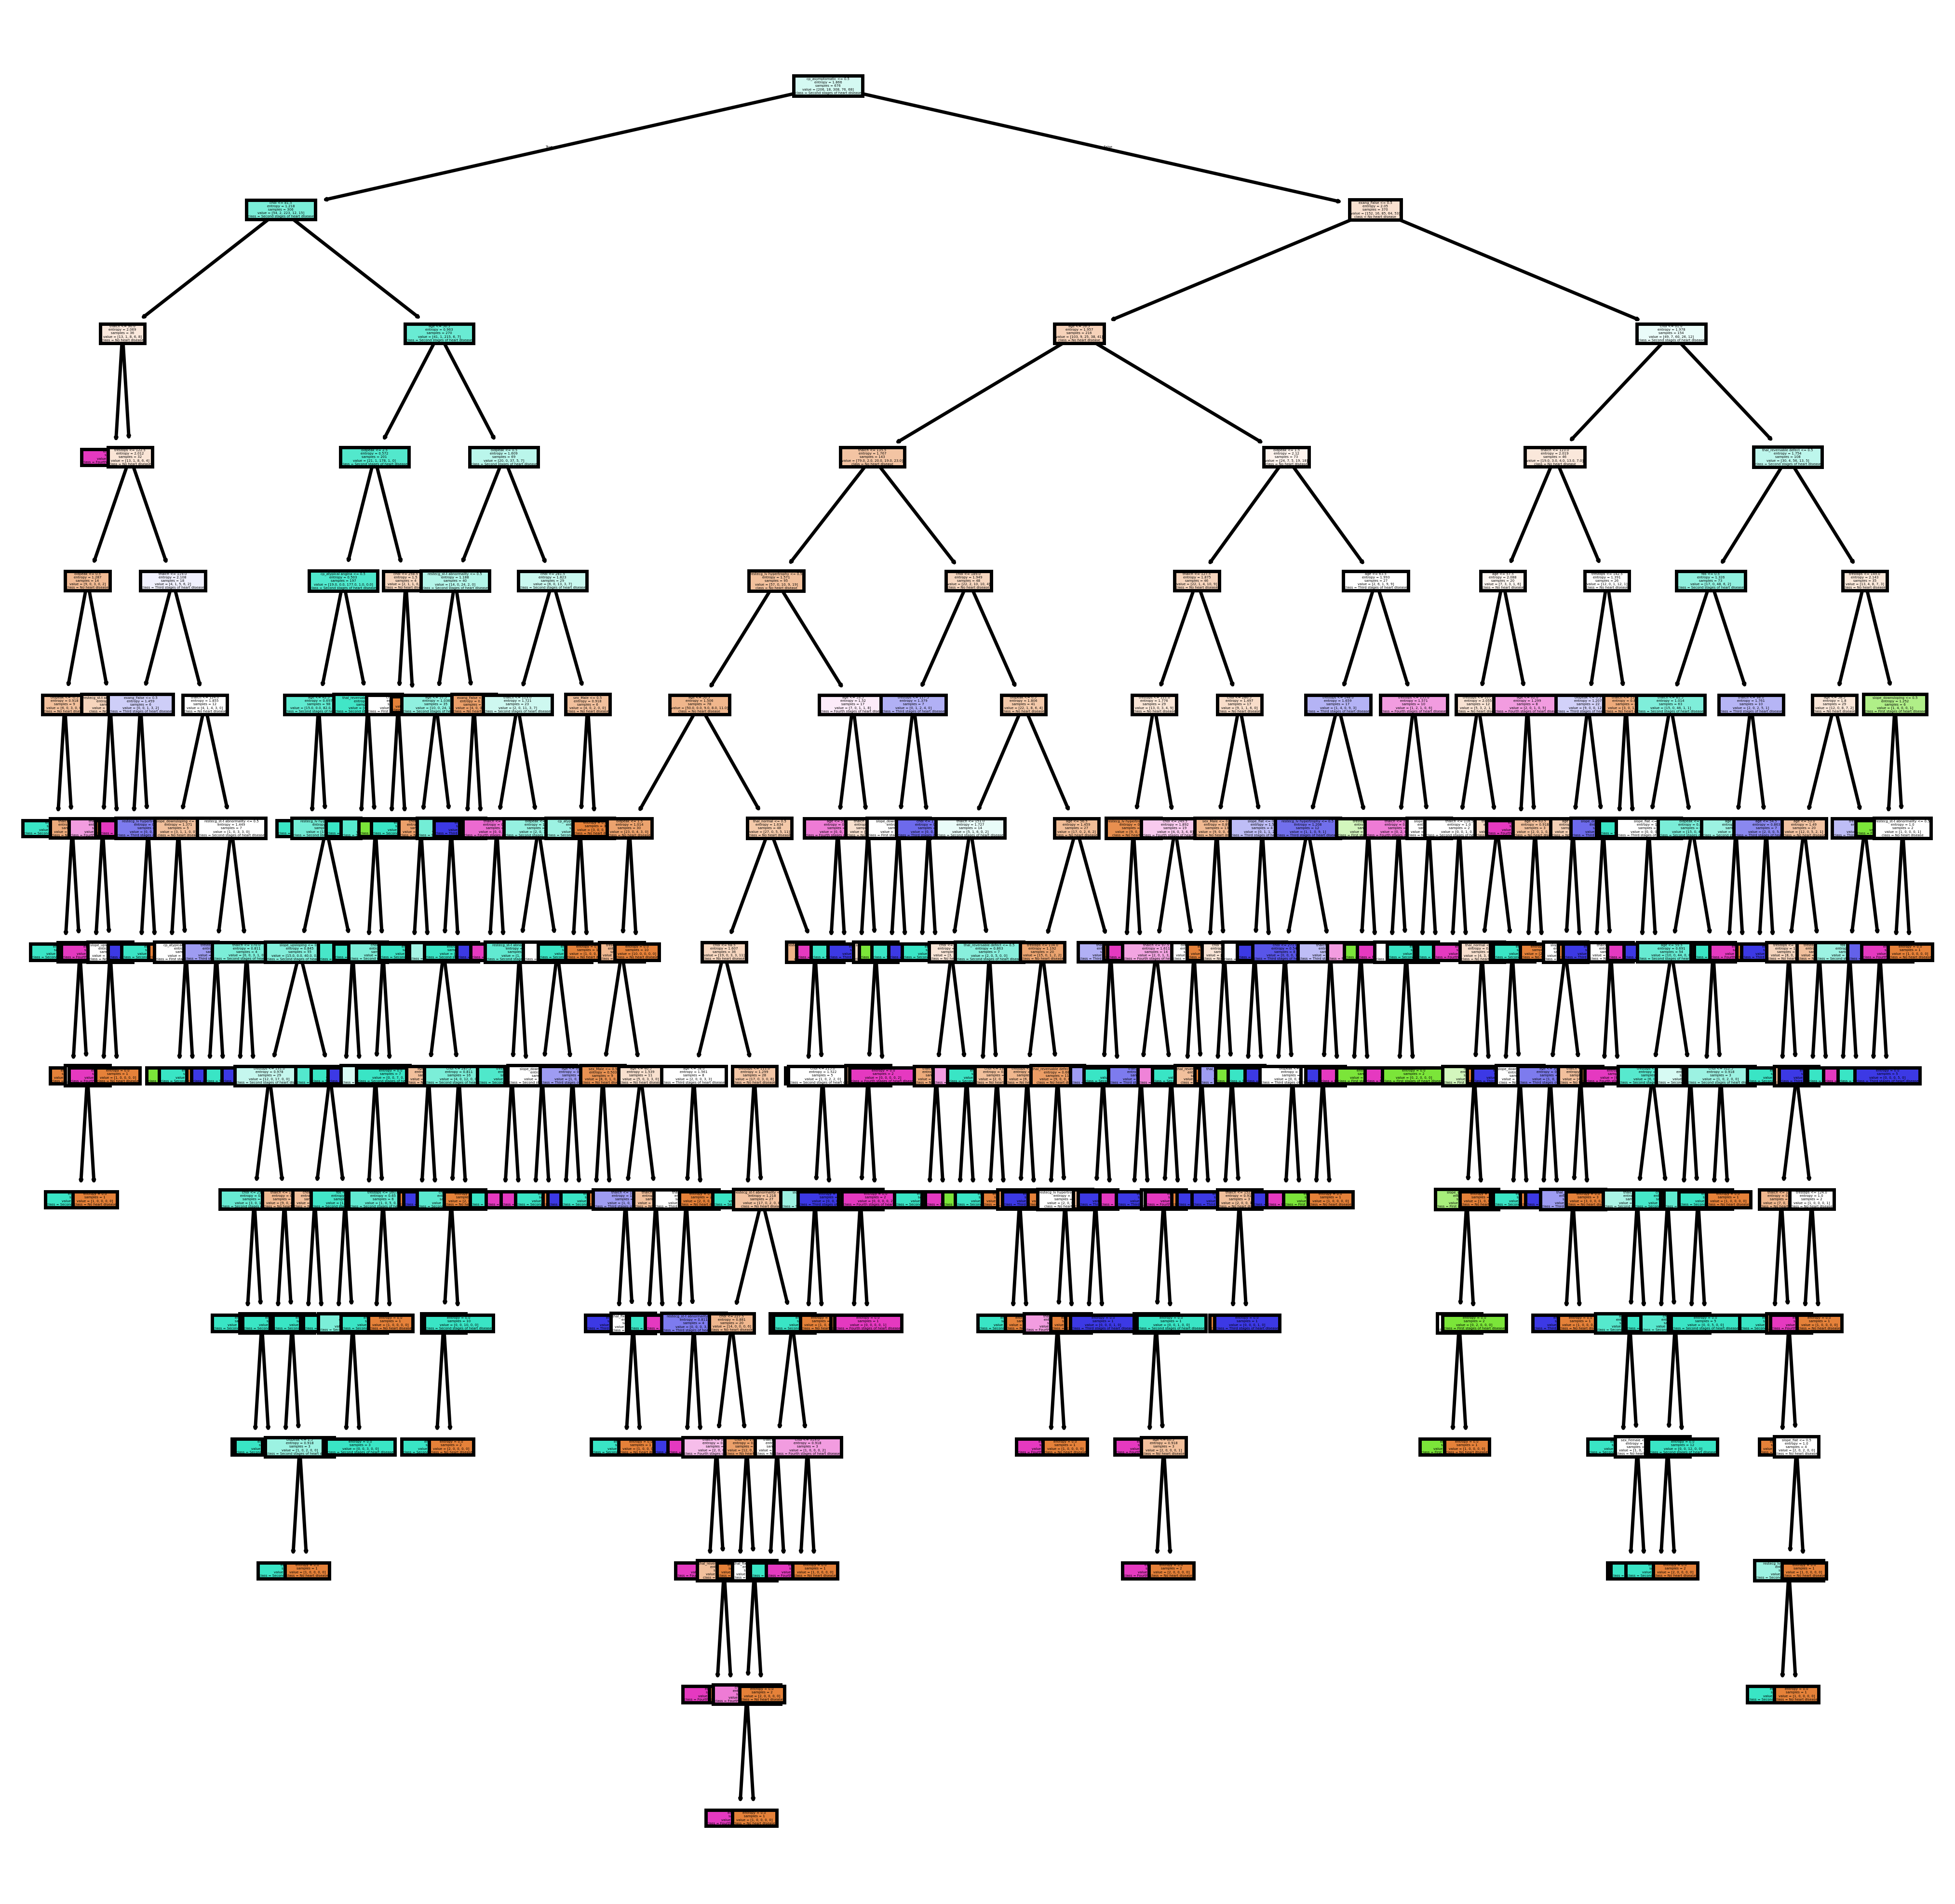

In [39]:
tree.plot_tree(dt,feature_names=x.columns,class_names=[str(i) for i in y.unique()], filled=True)
plt.show()

In [40]:
dt.feature_importances_ #It return information gain of all columns

array([0.154128  , 0.11331858, 0.15435052, 0.01643643, 0.17148579,
       0.06839246, 0.01095649, 0.01006361, 0.10323375, 0.00898361,
       0.        , 0.        , 0.02365813, 0.00317069, 0.02834802,
       0.03199189, 0.        , 0.        , 0.02219263, 0.01536738,
       0.01261523, 0.00797053, 0.01174868, 0.03158758])

In [41]:
x.columns

Index(['age', 'trestbps', 'chol', 'fbs', 'thalch', 'oldpeak', 'sex_Female',
       'sex_Male', 'cp_asymptomatic', 'cp_atypical angina', 'cp_non-anginal',
       'cp_typical angina', 'restecg_lv hypertrophy', 'restecg_normal',
       'restecg_st-t abnormality', 'exang_False', 'exang_True', 'exang_FALSE',
       'slope_downsloping', 'slope_flat', 'slope_upsloping',
       'thal_fixed defect', 'thal_normal', 'thal_reversable defect'],
      dtype='object')

# Hyperparameter tuning


In [42]:
DecisionTreeRegressor()

DecisionTreeRegressor()

In [43]:
from sklearn.model_selection import GridSearchCV

In [44]:
# Classifier
params = {
    'criterion' : ["gini", "entropy", "log_loss"],
    'max_depth' : [3,5,7,9,11],# Any Nuber
    'splitter' :['best','random']
}

In [45]:
grid = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=params,
                   verbose=1)

In [46]:
grid.fit(xtrain,ytrain)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [3, 5, 7, 9, 11],
                         'splitter': ['best', 'random']},
             verbose=1)

## Model Evaluation and Analysis

Comparing the performance before and after hyperparameter implementation provides insights into the impact of hyperparameter tuning on the Decision Tree model's performance:

Accuracy Improvement:

The accuracy of the model improved from 56.04% before hyperparameter tuning to 57.69% after hyperparameter implementation. This indicates that the selected combination of hyperparameters ('criterion': 'gini', 'max_depth': 5, 'min_samples_split': 2) led to a slight improvement in overall prediction correctness.

Hyperparameter Selection:

The best parameters obtained from hyperparameter tuning were {'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 2}. This suggests that using the Gini impurity criterion and limiting the maximum depth of the tree to 5 while requiring at least 2 samples to split a node resulted in better generalization performance on the testing set.

Consistency in Metrics:

While there was an improvement in accuracy, other evaluation metrics such as precision, recall, and F1 score remained relatively consistent before and after hyperparameter implementation. This suggests that the improvement in accuracy was not at the expense of sacrificing precision or recall.

Further Optimization:

While the improvement in accuracy is positive, there might be further opportunities for optimization. Experimenting with additional hyperparameters or exploring different algorithms could potentially lead to further enhancements in model performance.

In summary, hyperparameter tuning led to a modest improvement in the Decision Tree model's accuracy, indicating the effectiveness of selecting optimal hyperparameters. However, there might still be room for further optimization, which could be explored in future iterations.

# Interview Questions:

## 1. What are some common hyperparameters of decision tree models, and how do they affect the model's performance?
- Decision trees are powerful models extensively used in machine learning for classification and regression tasks. The structure of decision trees resembles the flowchart of decisions helps us to interpret and explain easily.
- The performance of decision trees highly relies on the hyperparameters, selecting the optimal hyperparameter can significantly impact the model’s accuracy, generalization ability, and robustness.
- Decision trees are versatile algorithms used in machine learning that perform classification and regression tasks. They can even handle multi-output tasks for various predictive modeling tasks.
-  A model parameter is an adjustable parameter that is said to be learned from the training data during the model's training process. In decision trees, there are two types of model parameters such as learnable and non-learnable parameters.

# 2. What is the difference between the Label encoding and One-hot encoding?
- One hot Encoding
1. A column with categorical values is split into multiple columns.
2. It will add more columns and will be computationally heavy
3. Redundant information is there
4. Only 0 and 1 are used to represent data

- 	Label Encoding
1. The categorical values are labeled into numeric values by assigning each category to a number
2. Different columns are not added. Rather different categories are converted into numeric values. So fewer computations.
3. Unique information is there
4. Different integers are used to represent data